# Data exploration

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join("../scripts"))) 

from logger import App_Logger
app_logger = App_Logger("../logs/Amharic_exploration.log").get_app_logger()

from data_infos import dataframeInfo
from utils_plots import plot_count

import dvc.api

### Import the dataset

In [2]:
path = '../data/Amharic News Dataset.csv'
repo = '../'
version='v00'

data_url = dvc.api.get_url(
    path=path,
	repo=repo,
	rev=version
	)


In [3]:
data = pd.read_csv(data_url)

In [4]:
data.sample(5)

,headline,category,date,views,article,link
286,በመተከል ዞን ለሕዝብ ጥቅም የሚሠራ አመራርና አደረጃጀት እንዲመቻች ተጠየቀ,ሀገር አቀፍ ዜና,"December 25, 2020",22,አሶሳ(ኢዜአ) በቤኒሻንጉል ጉሙዝ ክልል መተከል ዞን በየጊዜው የሚከሰተው ...,https://www.press.et/Ama/?p=38086
29618,ጋቶች ፓኖም ሌላኛውን የግብፅ ቡድን ተቀላቀለ,ስፖርት,"August 19, 2019",Unknown,ባለፈው ሳምንት ከ ኤል ጎውና ጋር የተለያየው ኢትዮጵያዊው አማካይ ጋቶች ...,https://soccerethiopia.net/football/49997
12648,የምክንያታዊ ወጣት መድረክ በለገጣፎ ከተማ እየተካሄደ ነው,ሀገር አቀፍ ዜና,"Jan 12, 2021",106,አዲስ አበባ ፣ጥር 4 ፣ 2013 (ኤፍ.ቢ.ሲ) በኦሮሚያ ክልል በለገጣፎ ...,https://www.fanabc.com/%e1%8b%a8%e1%88%9d%e1%8...
46509,ብአዴን የተወሰኑ ከፍተኛ አመራሮችን ከማእከላዊ ኮሚቴ አባልነት አገደ፣ማስ...,ፖለቲካ,"October 11, 2016",Unknown,የብሄረ አማራ ዴሞክራሲያዊ ንቅናቄ/ብአዴን/ የአመራር ድክመት ባሳዩ የተወ...,https://waltainfo.com/am/28716/
14972,ለትምህርት ቤቶች 50 ሚሊየን የአፍና አፍንጫ መሸፈኛ ጭምብል ለማሰራጨት ...,ሀገር አቀፍ ዜና,"Oct 13, 2020",389,አዲስ አበባ፣ ጥቅምት 3፣ 2013 (ኤፍ.ቢ.ሲ) በኢትዮጵያ ኮሮና ቫይረስ...,https://www.fanabc.com/%e1%88%88%e1%89%b5%e1%8...


### Data infos

In [5]:
dataInfos = dataframeInfo(data)

In [6]:
dataInfos.data_shape()
print('----------------------------------')
dataInfos.percent_missing()
print('----------------------------------')
dataInfos.data_types()
print('----------------------------------')
data.columns

 There are 51483 rows and 6 columns
----------------------------------
The dataset contains 0.0 % missing values.
----------------------------------
----------------------------------


Index(['headline', 'category', 'date', 'views', 'article', 'link'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


### Exploration

#### headline

In [8]:
data.headline.value_counts()

አፍሪካ በጋዜጦች                                                         49
አፍሪቃ በጋዜጦች                                                         32
ዲሞክራሲ በተግባር                                                        16
የከፍተኛ ሊግ አጫጭር መረጃዎች                                                13
ኮቪድ-19 በዩናይትድ ስቴትስ                                                 12
                                                                   ..
በኢትዮጵያ የኮሮና ቫይረስ የተገኘባቸው አብዛኞቹ ሰዎች በለይቶ ማቆያ ውስጥ የነበሩ መሆናቸው ተገለፀ     1
አቶ ገዱ አንዳርጋቸው ከኔዘርላንድስ የውጭ ንግድና ልማት ትብብር ሚኒስትር ጋር በስልክ ተወያዩ         1
አይ ኤም ኤፍ ለኢትዮጵያ የ411 ሚሊየን ዶላር ድጋፍ አፀደቀ                              1
የግብርና ሚኒስትር አቶ ዑመር ሁሴንና ኢ/ር ታከለ ኡማ ለከተማ ግብርና የተለዩ ቦታዎችን ጎበኙ         1
ለህግ የበላይነት መከበር ሁሉም በጋራ መስራት እንዳለበት ተጠቆመ                            1
Name: headline, Length: 50095, dtype: int64

/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4768 (\N{ETHIOPIC SYLLABLE GLOTTAL A}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4941 (\N{ETHIOPIC SYLLABLE FE}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4650 (\N{ETHIOPIC SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4779 (\N{ETHIOPIC SYLLABLE KAA}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4704 (\N{ETHIOPIC SYLLABLE BA}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPyth

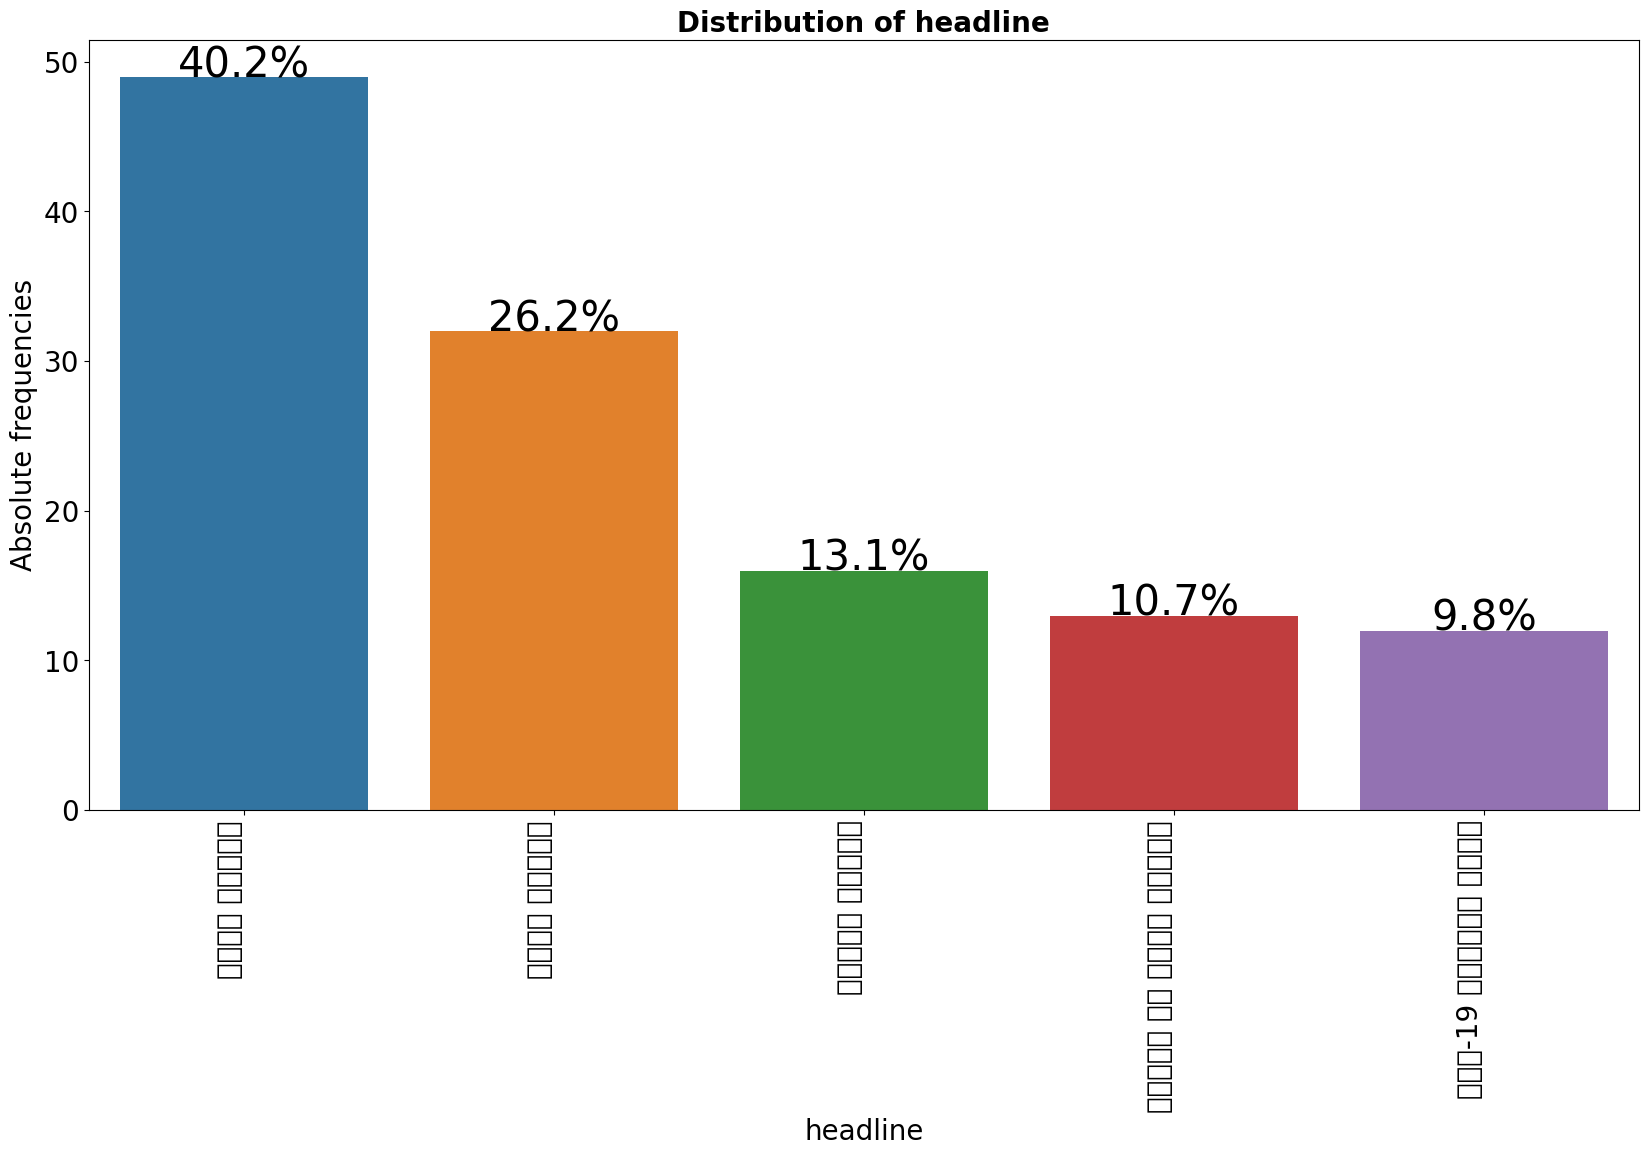

In [9]:
plot_count(data.loc[data['headline'].isin(list(data.headline.value_counts()[:5].index))], 'headline')

#### category

In [10]:
data.category.value_counts()

ሀገር አቀፍ ዜና    20674
ስፖርት          10411
ፖለቲካ           9325
ዓለም አቀፍ ዜና     6543
ቢዝነስ           3894
መዝናኛ            635
Name: category, dtype: int64

In [11]:
# data['category'].value_counts().plot(kind='bar')
# import seaborn as sns
# sns.set()
# sns.countplot(data['category'], color='gray')
datac = data.copy()
datac['category'] = datac['category'].replace(['መዝናኛ', 'ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ'],['entertainment',
                        'world_news','busniess', 'country_news', 'politica'] )


/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4608 (\N{ETHIOPIC SYLLABLE HA}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4872 (\N{ETHIOPIC SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4653 (\N{ETHIOPIC SYLLABLE RE}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4768 (\N{ETHIOPIC SYLLABLE GLOTTAL A}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4672 (\N{ETHIOPIC SYLLABLE QA}) missing from current font.
  func(*args, **kwargs)
/home/josias_ounsinli/.local/lib/python3.8/site-packages/IPytho

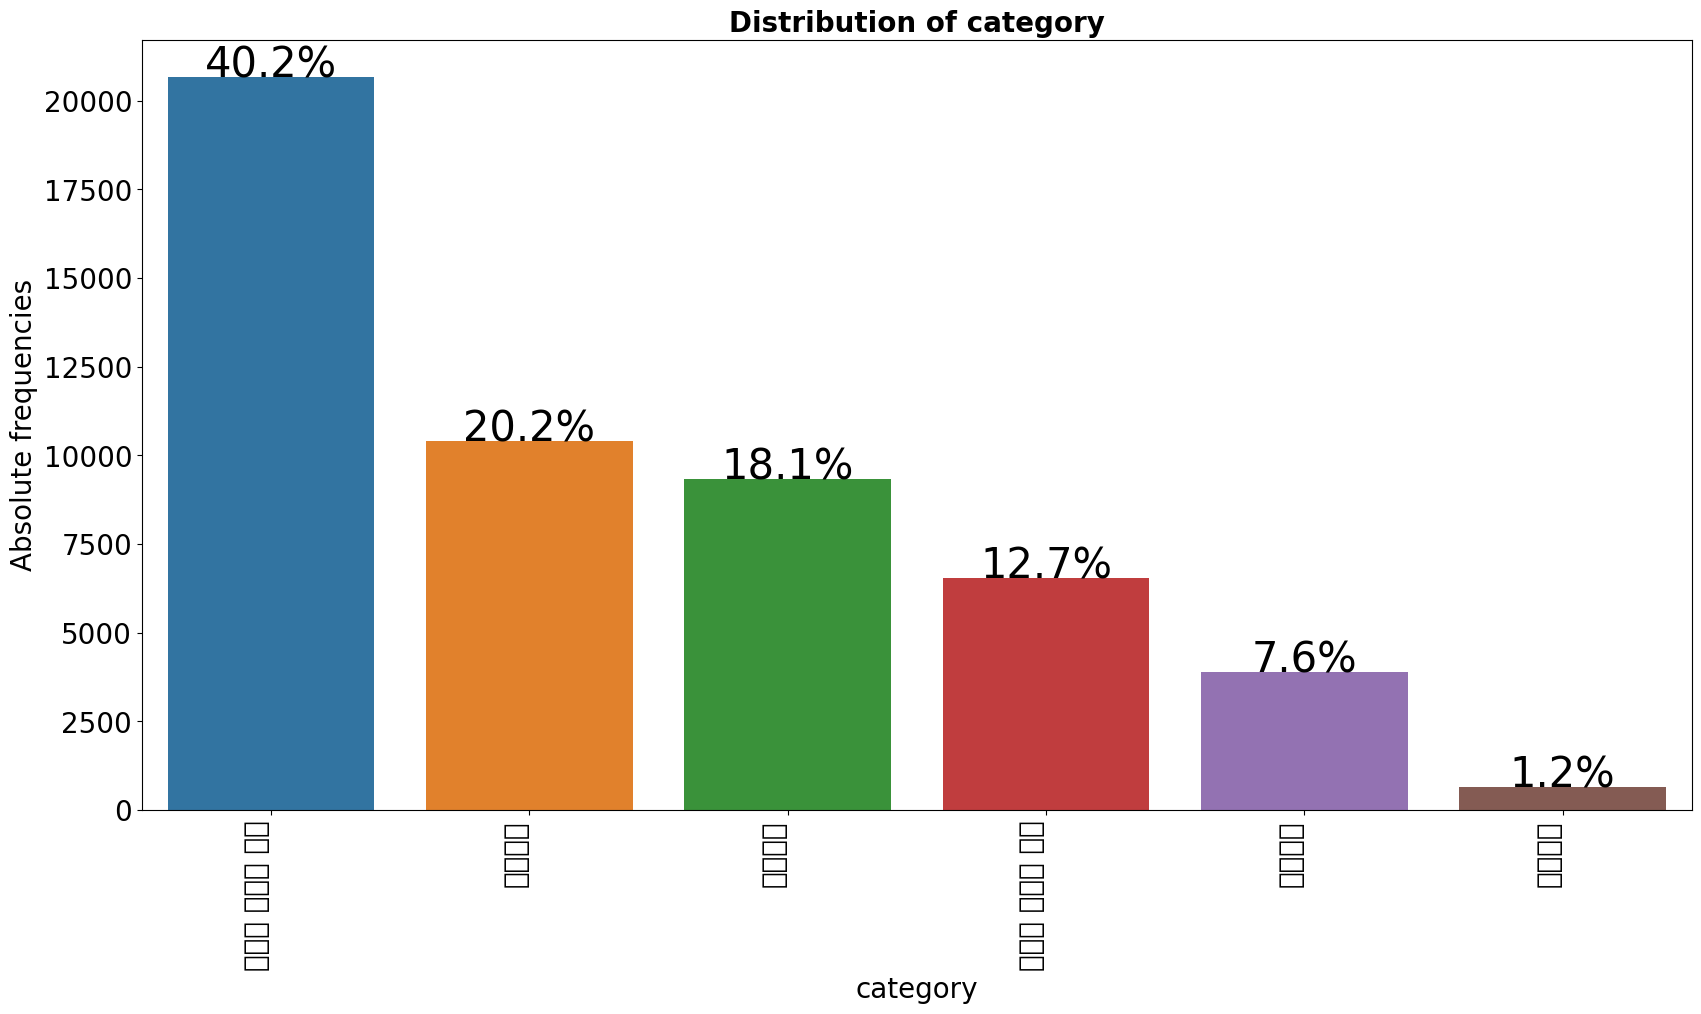

In [12]:
plot_count(data, 'category')

#### views

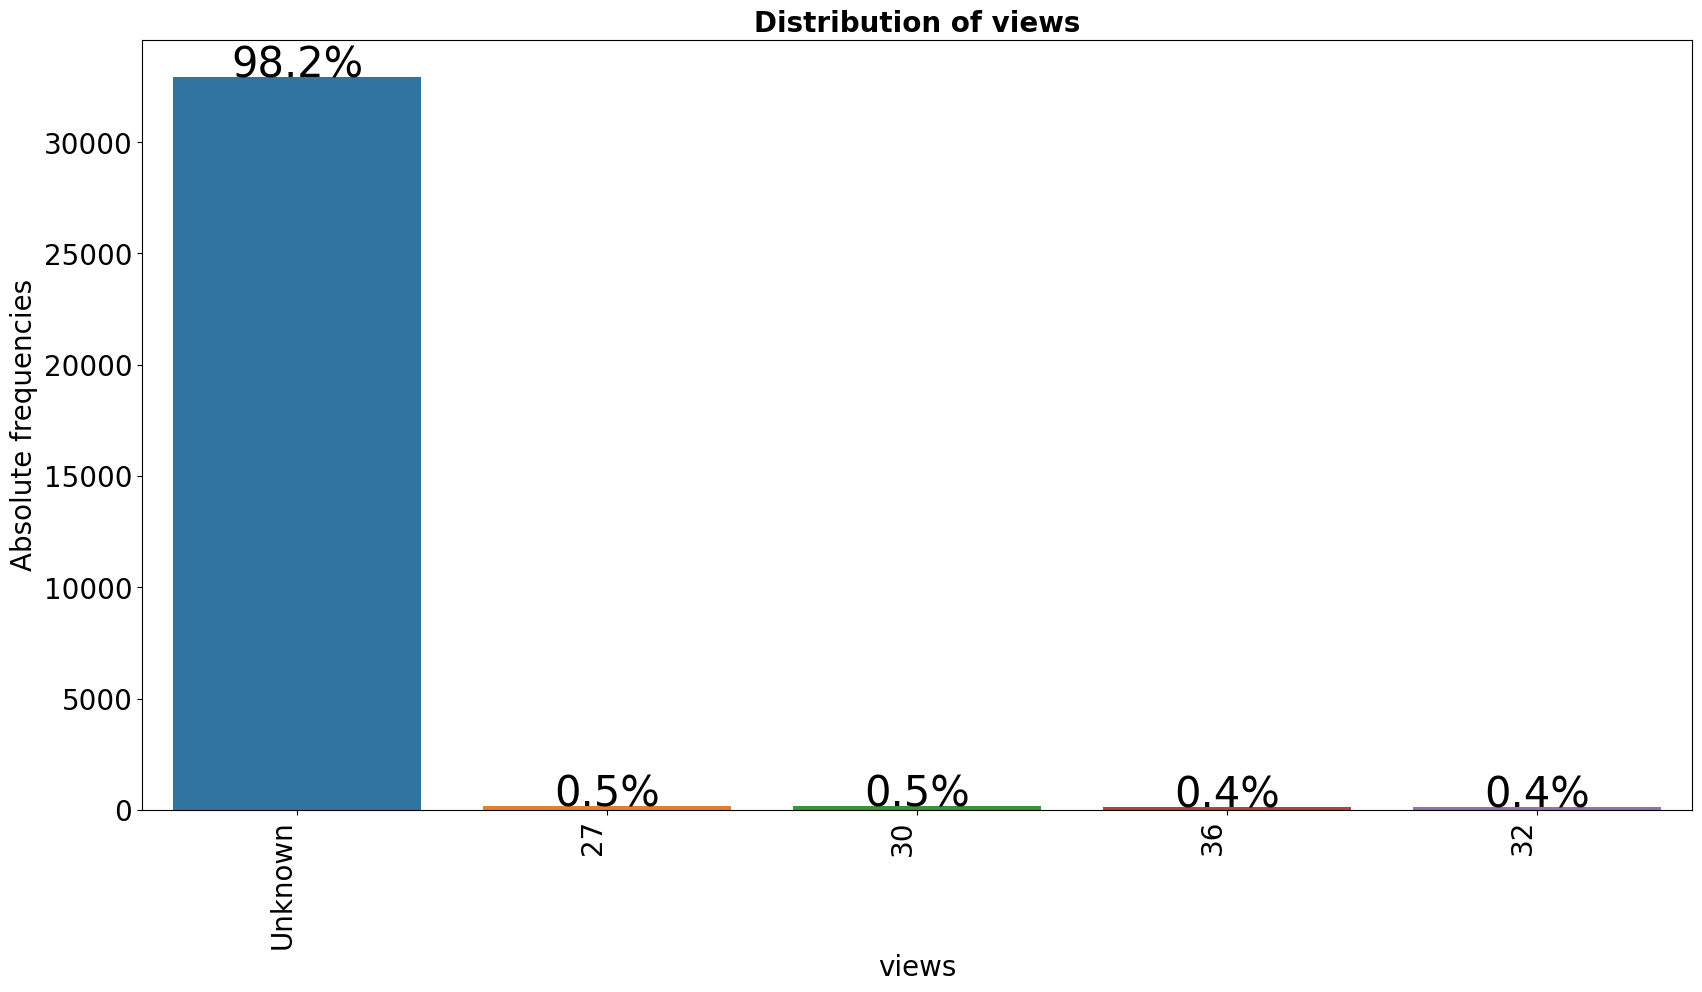

In [13]:
plot_count(data.loc[data['views'].isin(list(data.views.value_counts()[:5].index))], 'views')

#### article

In [14]:
articles_df = data.copy()
articles_df["char_length"] = [len(i) for i in articles_df.article]

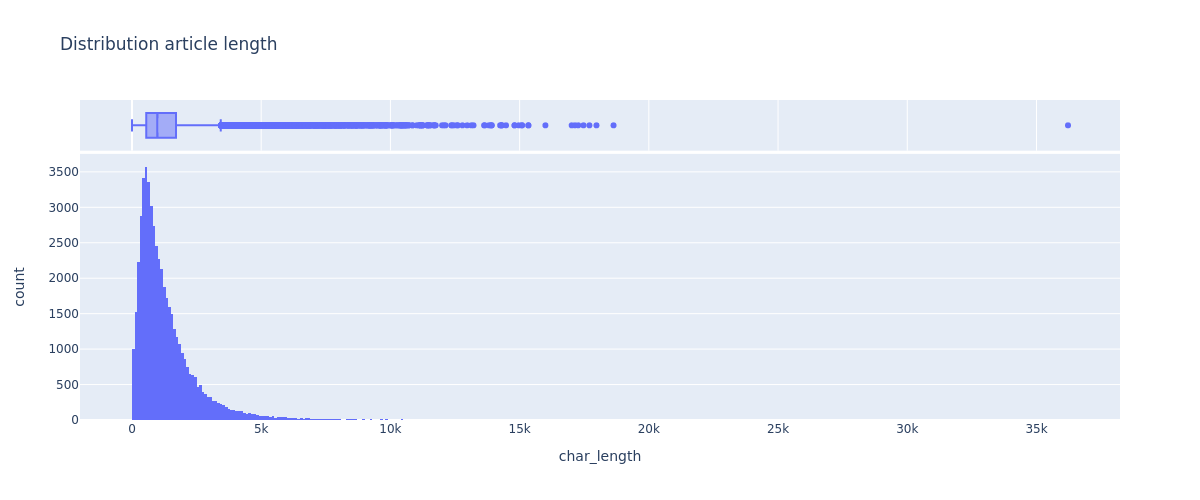

In [15]:
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

fig = px.histogram(articles_df, x="char_length", marginal="box", nbins=500,
                   title='Distribution article length',)
Image(pio.to_image(fig, format='png', width=1200))

#### link

In [16]:
data.link.value_counts()

https://amharic.voanews.com//a/london-marathon/5608398.html                                                                                                                                                                      3
https://amharic.voanews.com//a/ethiopia-tigrai-mekele/5679989.html                                                                                                                                                               3
https://amharic.voanews.com//a/ethiopia-political-crisis-tplf-and-adp-voa-crossfire-alula-kebede-july-2019/4998828.html                                                                                                          3
https://amharic.voanews.com//a/bale-roba-road-closure/5461608.html                                                                                                                                                               3
https://amharic.voanews.com//a/covid-main/5443343.html                                      

<AxesSubplot: >

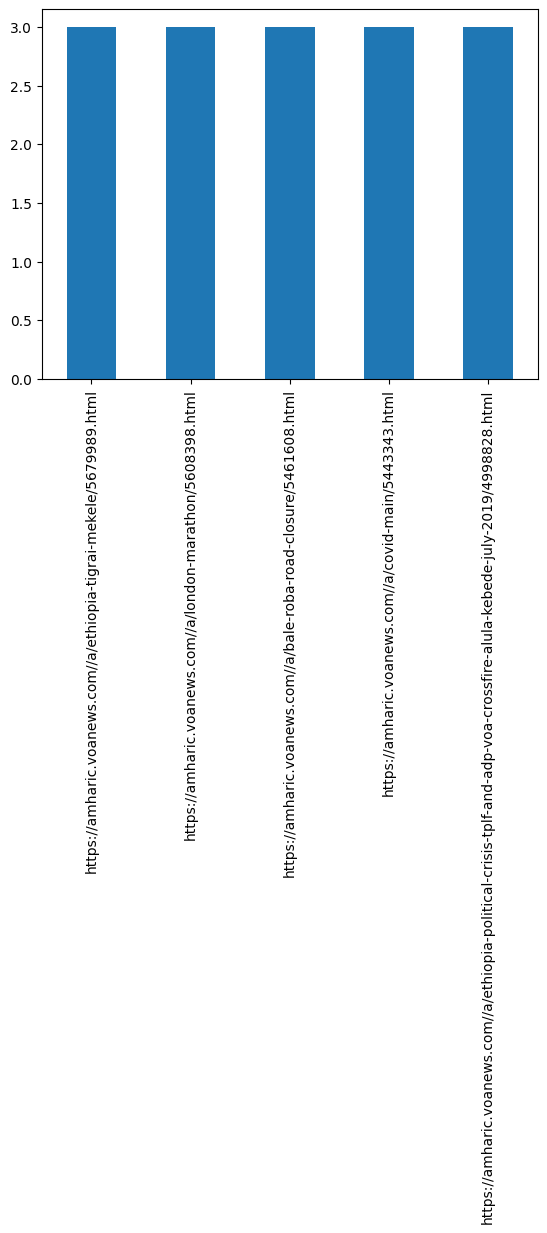

In [17]:
data.loc[data['link'].isin(list(data.link.value_counts()[:5].index))]['link'].value_counts().plot(kind='bar')

In [18]:
list(data['link'])[0][:25].replace('https://www.', '')

'press.et/Ama/'

In [19]:
linkdf = data.copy()
site_name = []
for l in linkdf['link']:
    site_name.append(l.replace('https://', '')[:15])

linkdf['site_name'] = site_name
linkdf['site_name'].value_counts()

soccerethiopia.    9193
waltainfo.com/a    8785
www.fanabc.com/    7784
amharic.voanews    6981
www.ethiopianre    6281
www.press.et/Am    5598
www.amharaweb.c    2442
www.addisadmass    1847
am.al-ain.com/a     887
addismaleda.com     869
www.bbc.com/amh     816
Name: site_name, dtype: int64

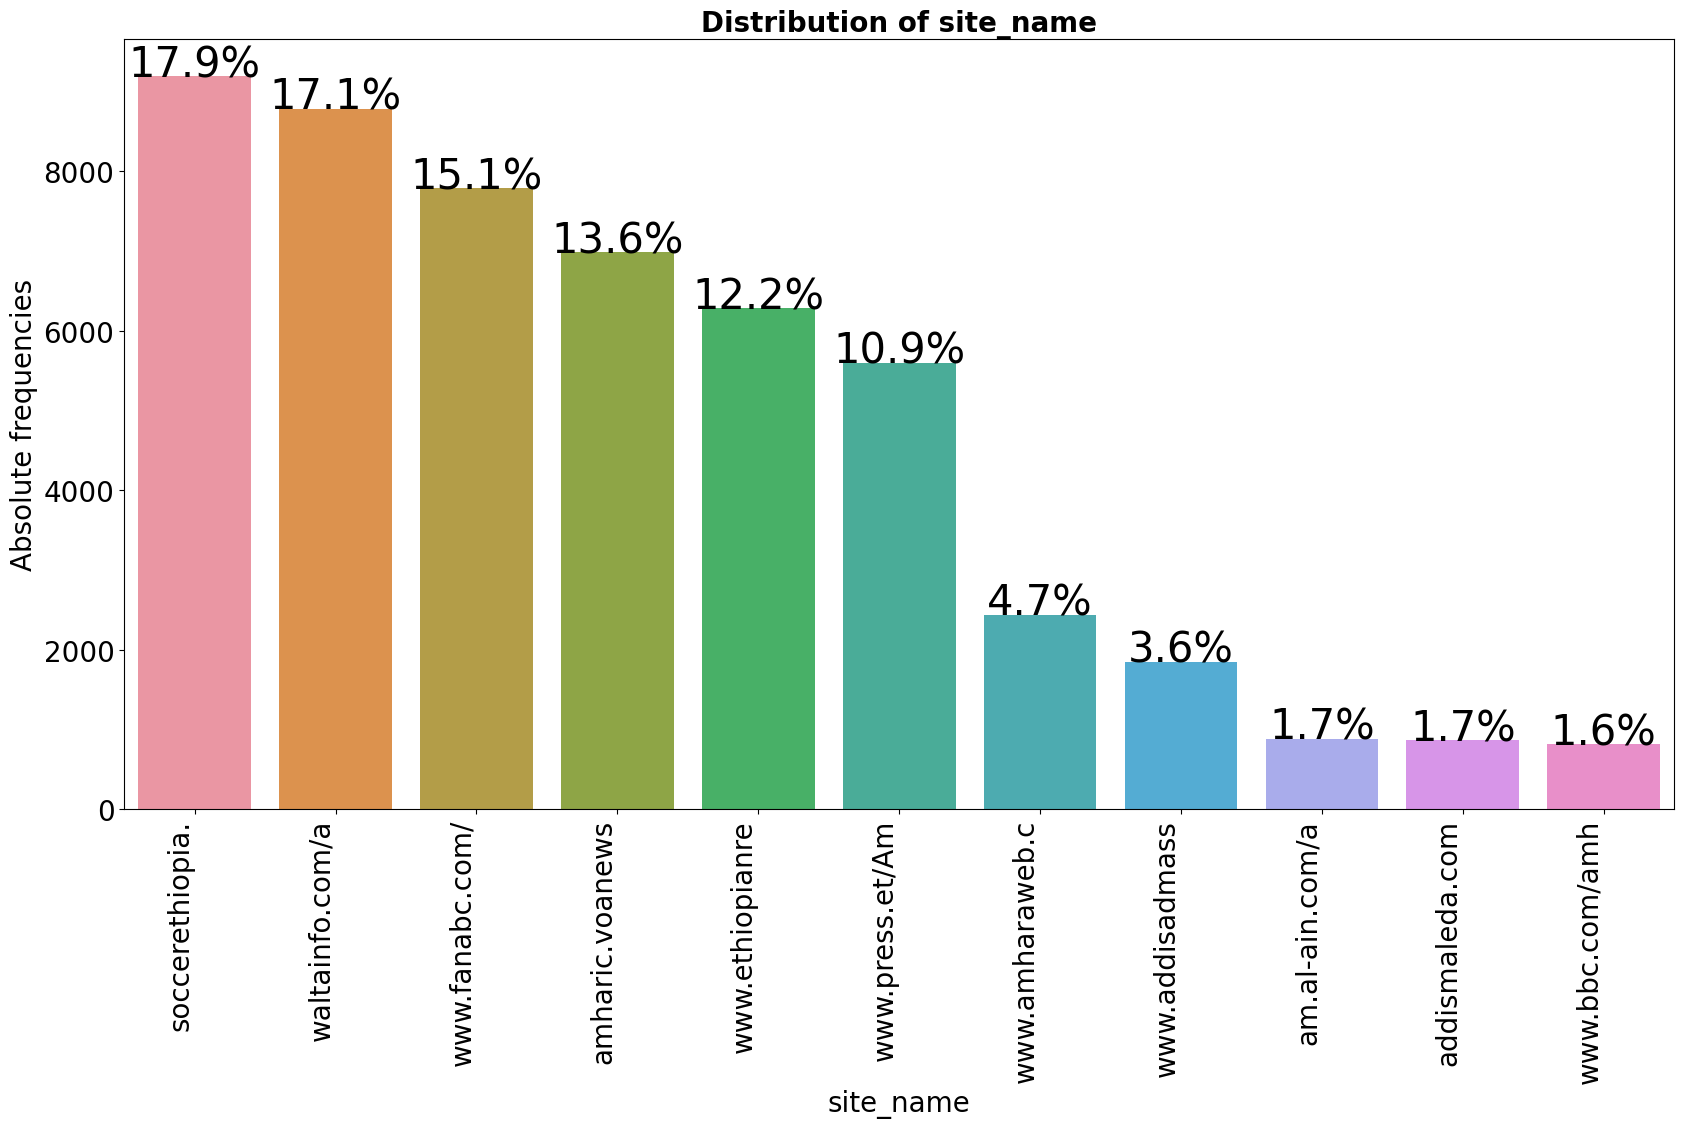

In [20]:
plot_count(linkdf, 'site_name')